# Week 12 Lecture - 14.4, 14.5, and 14.6
In this lecture, I will cover sections 14.4 (The Central Limit Theorem), 14.5 ( The Variability of the Sample Mean), and 14.6 (Choosing a Sample Size).

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [ ]:
wheel = Table.read_table('roulette.csv')
wheel

In [ ]:
# win when red
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

In [ ]:
red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )
red

In [ ]:
# graph the winnings
red.select('Winnings: Red').hist(bins=np.arange(-1.5, 1.6, 1))

The code below simulates your net gain if you bet $1 on red on 400 different spins of the roulette wheel.

In [ ]:
num_bets = 400
repetitions = 10000

net_gain_red = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)


results = Table().with_column(
    'Net Gain on Red', net_gain_red
    )

In [ ]:
# create histogram
results.hist(bins=np.arange(-80, 50, 6))

In [ ]:
# Center of distribution - Average = Mean
average_per_bet = 1*(18/38) + (-1)*(20/38)
average_per_bet

In [ ]:
# Expected wins in 400 spins
400 * average_per_bet

In [ ]:
results

In [ ]:
np.mean(results.column(0))

In [ ]:
# Spread of distribution
np.std(results.column(0))

# Summary
The net gain in 400 bets is the sum of the 400 amounts won on each individual bet. The probability distribution of that sum is approximately normal, with an average and an SD that we can approximate.

# Average Flight Delay

In [ ]:
united = Table.read_table('united.csv')
united

In [ ]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [ ]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

mean_delay, sd_delay

In [ ]:
delay = united.select('Delay')
delay

In [ ]:
np.mean(delay.sample(400).column('Delay'))

In [ ]:
# 400 samples repeated 10,000 times
sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column(
    'Sample Mean', means
)

In [ ]:
# histograms of results
results.hist(bins=np.arange(10, 25, 0.5))

# Central Limit Theorem
The Central Limit Theorem says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.
<br>
The Central Limit Theorem makes it possible to make inferences with very little knowledge about the population, provided we have a large random sample. That is why it is central to the field of statistical inference.

## Proportion of Purple Flowers

In [ ]:
colors = make_array('Purple', 'Purple', 'Purple', 'White')

model = Table().with_column('Color', colors)

model

In [ ]:
# take a sample of 200 plants and repeat the process 10,000
props = make_array()

num_plants = 200
repetitions = 10000

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props = np.append(props, new_prop)
    
results = Table().with_column('Sample Proportion: 200', props)

In [ ]:
# draw histogram of results
results.hist(bins=np.arange(0.65, 0.85, 0.01))

In [ ]:
# increase the sample size to 800
props2 = make_array()

num_plants = 800

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props2 = np.append(props2, new_prop)
    
results = results.with_column('Sample Proportion: 800', props2)

In [ ]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))

# Variability of the Sample Mean

In [ ]:
united

In [ ]:
delay

In [ ]:
pop_mean = np.mean(delay.column('Delay'))
pop_mean

In [ ]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [ ]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample.column(label))
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))

In [ ]:
simulate_sample_mean(delay, 'Delay', 100, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

In [ ]:
# change sample size to 400
simulate_sample_mean(delay, 'Delay', 400, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

In [ ]:
# Increase sample size to 625
simulate_sample_mean(delay, 'Delay', 625, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

In [ ]:
# SD of all the sample Means
pop_sd = np.std(delay.column('Delay'))
pop_sd

In [ ]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)

sd_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(delay.sample(n).column('Delay')))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_means,
    'pop_sd/sqrt(n)', pop_sd/np.sqrt(sample_sizes)
)

In [ ]:
sd_comparison

In [ ]:
sd_comparison.plot('Sample Size n')

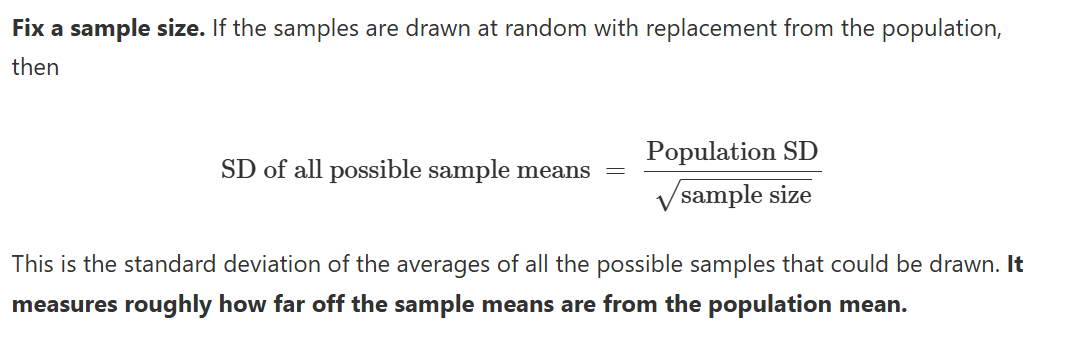

In [ ]:
baby = Table.read_table('baby.csv')
baby

In [ ]:
heights = baby.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

In [ ]:
sd_height = np.round(np.std(heights),1)
sd_height

In [ ]:
heights.min(), heights.max()

In [ ]:
baby.hist('Maternal Height', bins=np.arange(52.5, 73.6, 1), unit='inch')
positions = np.arange(-3, 3.1, 1)*sd_height + mean_height
plots.xticks(positions);

# How to spot the SD on a bell shaped curve
To see how the SD is related to the curve, start at the top of the curve and look towards the right. Notice that there is a place where the curve changes from looking like an “upside-down cup” to a “right-way-up cup”; formally, the curve has a point of inflection. That point is one SD above average. It is the point z = 1, which is “average plus 1 SD” = 66.5 inches.

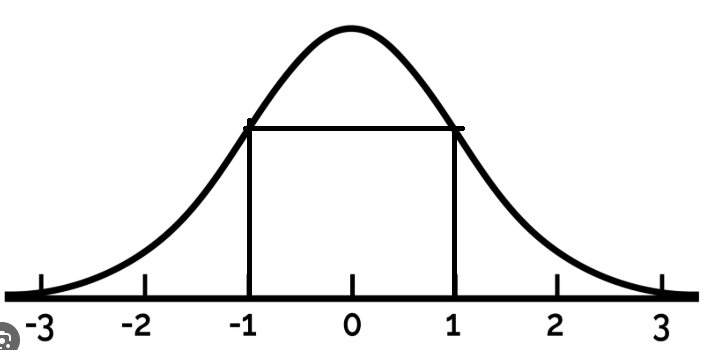


# The Standard Normal Curve
Here are some properties of the curve. Some are apparent by observation, and others require a considerable amount of mathematics to establish.

- The total area under the curve is 1. So you can think of it as a histogram drawn to the density scale.

- The curve is symmetric about 0. So if a variable has this distribution, its mean and median are both 0.

- The points of inflection of the curve are at -1 and +1.

-- If a variable has this distribution, its SD is 1. The normal curve is one of the very few distributions that has an SD so clearly identifiable on the histogram.

```
from scipy import stats
stats.norm.cdf(z)
```
where z is the number of standard deviations from the mean.


In [ ]:
from scipy import stats
stats.norm.cdf(1)

## Area to the left of 1 on the normal curve is 84.13%

In [ ]:
1 - stats.norm.cdf(1)

## Area to the right of 1 on the normal curve is 15.87%

In [ ]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

## Area between -1 and 1 on the normal curve is 68.27%

In [ ]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

## Area between -2 and 2 on the normal curve is 95.45%

In [ ]:
stats.norm.cdf(3) - stats.norm.cdf(-3)

## Area between -3 and 3 on the normal curve is 99.73%

# Empirical Rule
When our curve is bell shaped we can use the Empirical Rule which is an approximation of the Normal curve.  Otherwise, use Chebychev;s bounds
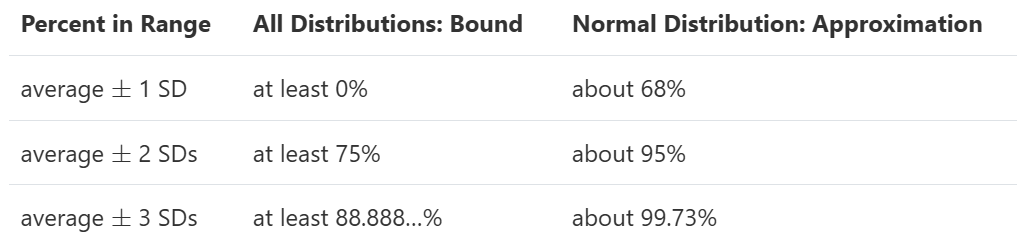

# Choosing a Sample Size
If I want to know the sample size to determine the percentage of people who are for a proposition that is on the ballot within a 1% margin and I want to be 95% confident.  I can use the concept of confidence intervals to determine the sample size.

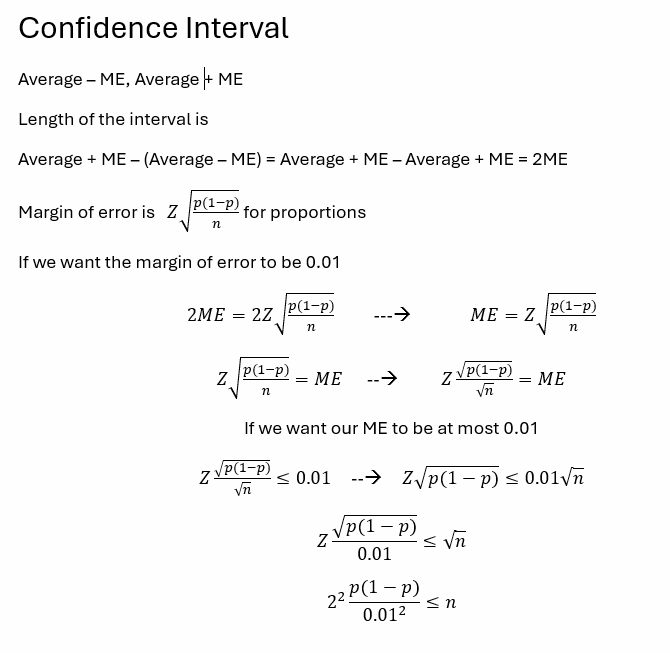
The Margin of error is the accuracy.


In [4]:
accuracy = .01
z = 2
p = .5
np.ceil(4 * p*(1-p)/accuracy**2)

10000.0

In [6]:
p = .50
px = make_array()
ac = make_array()
n_sample = make_array()
for j in np.arange(.1, .91, .1):
    for i in np.arange(.01, .11, .01):
        nx = np.ceil(4 * j*(1-j)/i**2)
        px = np.append(px, j)
        ac = np.append(ac, i)
        n_sample = np.append(n_sample, nx)
    

In [8]:

sample_size_n = Table().with_columns('Margin of Error', ac,
                                     'Sample Size', n_sample,
                                     'p value', px)
sample_size_n

Margin of Error | Sample Size | p value
0.01            | 3601        | 0.1
0.02            | 901         | 0.1
0.03            | 401         | 0.1
0.04            | 226         | 0.1
0.05            | 144         | 0.1
0.06            | 100         | 0.1
0.07            | 74          | 0.1
0.08            | 57          | 0.1
0.09            | 45          | 0.1
0.1             | 37          | 0.1
... (80 rows omitted)

In [9]:
sample_size_n.where('p value', 0.2)


Margin of Error | Sample Size | p value
0.01            | 6401        | 0.2
0.02            | 1601        | 0.2
0.03            | 712         | 0.2
0.04            | 401         | 0.2
0.05            | 256         | 0.2
0.06            | 178         | 0.2
0.07            | 131         | 0.2
0.08            | 101         | 0.2
0.09            | 80          | 0.2
0.1             | 65          | 0.2

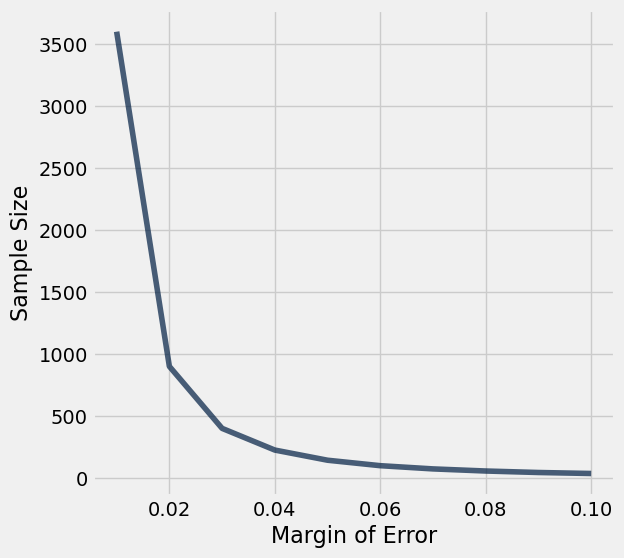

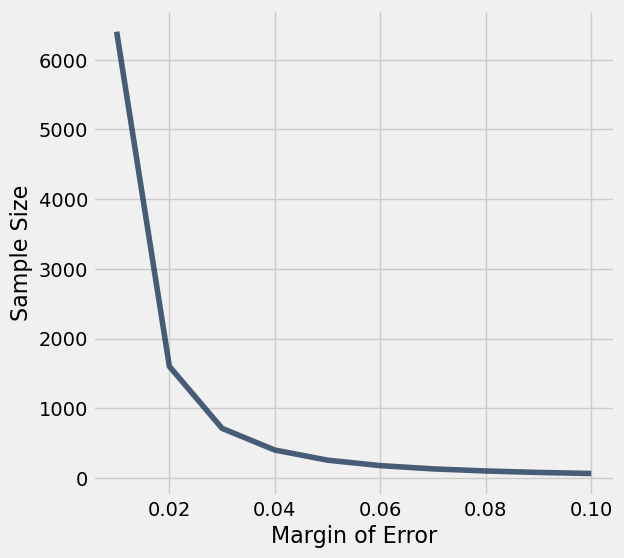

In [10]:
sample_size_n.where('p value', 0.1).plot('Margin of Error', 'Sample Size')
sample_size_n.where('p value', 0.2).plot('Margin of Error', 'Sample Size')

In [11]:
print('------------------------Margin of Error------------------------')
sample_size_n.pivot('Margin of Error', 'p value', values = 'Sample Size', collect = sum)

------------------------Margin of Error------------------------


p value | 0.01  | 0.02 | 0.03 | 0.04 | 0.05 | 0.06 | 0.07 | 0.08 | 0.09 | 0.1
0.1     | 3601  | 901  | 401  | 226  | 144  | 100  | 74   | 57   | 45   | 37
0.2     | 6401  | 1601 | 712  | 401  | 256  | 178  | 131  | 101  | 80   | 65
0.3     | 8400  | 2100 | 934  | 525  | 336  | 234  | 172  | 132  | 104  | 85
0.4     | 9600  | 2400 | 1067 | 600  | 384  | 267  | 196  | 150  | 119  | 97
0.5     | 10000 | 2500 | 1112 | 625  | 400  | 278  | 205  | 157  | 124  | 101
0.6     | 9600  | 2400 | 1067 | 600  | 384  | 267  | 196  | 150  | 119  | 97
0.7     | 8400  | 2100 | 934  | 525  | 336  | 234  | 172  | 132  | 104  | 84
0.8     | 6400  | 1600 | 712  | 400  | 256  | 178  | 131  | 100  | 80   | 64
0.9     | 3600  | 900  | 400  | 225  | 144  | 100  | 74   | 57   | 45   | 36